# SQL EM PYTHON (SQLite)

## Acessando banco de dados com Python

In [1]:
# Remover o arquivo com o banco de dados SQLite (caso ele exista)
import os
os.remove("escola.db") if os.path.exists("escola.db") else None

In [2]:
# Importar o módulo de acesso ao SQLite
import sqlite3

In [3]:
# Criar uma conexão com o banco de dados
# Se o banco de dados não existir, ele é criado neste momento
con = sqlite3.connect("escola.db") 

In [4]:
type(con)

sqlite3.Connection

In [5]:
# Criando um cursor
# Um cursor permite percorrer todos os registros em um conjunto de dados
cur = con.cursor()

In [6]:
type(cur)

sqlite3.Cursor

In [7]:
# Criar uma instrução SQL (neste caso, criar uma tabela)
sql_create = 'create table cursos '\
'(id interger primary key, '\
'titulo varchar(100), '\
'categoria varchar(100))'

In [8]:
# Executando a instrução SQL no cursor
cur.execute(sql_create)

In [9]:
# Criar outra sentença SQL para inserir os registros
sql_insert = 'insert into cursos values (?, ?, ?)'

In [10]:
# Dados
recset = [(1000, 'Ciência de Dados', 'Data Science'),
          (1001, 'Big Data Fundamentos', 'Big Data'),
          (1002, 'Python Fundamentos', 'Análise de Dados')]

In [11]:
# Inserindo os registros
for rec in recset:
    cur.execute(sql_insert, rec)

In [12]:
# Gravar a transação
con.commit()

In [13]:
# Criar outra sentença SQL para selecionar registros
sql_select = 'select * from cursos'

In [14]:
# Selecionar todos os registros e recupera os registros
cur.execute(sql_select)
dados = cur.fetchall()

In [15]:
# Mostrar 
for linha in dados:
    print('Curso Id: %d, Título: %s, Categoria: %s \n' % linha)

Curso Id: 1000, Título: Ciência de Dados, Categoria: Data Science 

Curso Id: 1001, Título: Big Data Fundamentos, Categoria: Big Data 

Curso Id: 1002, Título: Python Fundamentos, Categoria: Análise de Dados 



In [16]:
# Gerando outros registros
recset = [(1003, 'Gestão de dados com MongoDB', 'Big Data'),
          (1004, 'R Fundamentos', 'Análise de Dados')]

# Inserindo registros
for rec in recset:
    cur.execute (sql_insert, rec)

# Gravando a transação
con.commit()

In [17]:
# Selecionar todos os registros
cur.execute('select * from cursos')

# Recuperar os resultados
recset = cur.fetchall()

# Mostrar os resultados
for rec in recset:
    print('Curso Id: %d, Título: %s, Categoria: %s \n' % rec)

Curso Id: 1000, Título: Ciência de Dados, Categoria: Data Science 

Curso Id: 1001, Título: Big Data Fundamentos, Categoria: Big Data 

Curso Id: 1002, Título: Python Fundamentos, Categoria: Análise de Dados 

Curso Id: 1003, Título: Gestão de dados com MongoDB, Categoria: Big Data 

Curso Id: 1004, Título: R Fundamentos, Categoria: Análise de Dados 



In [18]:
# Fecha a conexão
con.close()

## Instruções INSERT no SQLite em Python

In [19]:
# Remover o arquivo com o banco de dados SQLite (caso ele exista)
import os
os.remove("dsa.db") if os.path.exists("dsa.db") else None

In [20]:
# Importando o módulo de acesso ao SQLite
import sqlite3

# Criaando uma conexão com o banco de dados
conn = sqlite3.connect("dsa.db") 

# Criando um cursor
c = conn.cursor()

# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')

# Função inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(10, '2018-05-02 14:32:11', 'Teclado', 90)")
    conn.commit()
    c.close()
    conn.close()

In [21]:
# Criar tabela
create_table()

In [22]:
# Inserir dados
data_insert()

## Inserindo dados com variáveis

In [23]:
import sqlite3
import random
import time
import datetime

# Criaando uma conexão com o banco de dados
conn = sqlite3.connect("dsa.db") 

# Criando um cursor
c = conn.cursor()

# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')

# Função inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES('2018-05-02 12:34:45', 'Teclado', 130.0)")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", (new_date, new_prod_name, new_valor))
    conn.commit()

In [24]:
# Gerando valores e inserindo na tabela
for i in range(10):
    data_insert_var()
    time.sleep(1)

In [25]:
# Encerrando a conexão
c.close()
conn.close()

## Leitura de dados

In [26]:
import sqlite3
import random
import time
import datetime

# Criaando uma conexão com o banco de dados
conn = sqlite3.connect("dsa.db") 

# Criando um cursor
c = conn.cursor()

# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')

# Função inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(002, '02-05-2016', 'Teclado', 130)")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)

# Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 60.0")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de colunas específicas
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])
        

In [27]:
# Select nos dados
leitura_todos_dados()

(10, '2018-05-02 14:32:11', 'Teclado', 90.0)
(11, '2022-07-23 12:28:40.313187', 'Monitor', 86.0)
(12, '2022-07-23 12:28:41.331573', 'Monitor', 77.0)
(13, '2022-07-23 12:28:42.345591', 'Monitor', 70.0)
(14, '2022-07-23 12:28:43.354567', 'Monitor', 88.0)
(15, '2022-07-23 12:28:44.378587', 'Monitor', 78.0)
(16, '2022-07-23 12:28:45.385915', 'Monitor', 88.0)
(17, '2022-07-23 12:28:46.394100', 'Monitor', 74.0)
(18, '2022-07-23 12:28:47.418608', 'Monitor', 95.0)
(19, '2022-07-23 12:28:48.421203', 'Monitor', 55.0)
(20, '2022-07-23 12:28:49.452082', 'Monitor', 51.0)


In [28]:
# Leitura de registros específicos
leitura_registros()

(10, '2018-05-02 14:32:11', 'Teclado', 90.0)
(11, '2022-07-23 12:28:40.313187', 'Monitor', 86.0)
(12, '2022-07-23 12:28:41.331573', 'Monitor', 77.0)
(13, '2022-07-23 12:28:42.345591', 'Monitor', 70.0)
(14, '2022-07-23 12:28:43.354567', 'Monitor', 88.0)
(15, '2022-07-23 12:28:44.378587', 'Monitor', 78.0)
(16, '2022-07-23 12:28:45.385915', 'Monitor', 88.0)
(17, '2022-07-23 12:28:46.394100', 'Monitor', 74.0)
(18, '2022-07-23 12:28:47.418608', 'Monitor', 95.0)


In [29]:
# Leitura de colunas específicas
leitura_colunas()

90.0
86.0
77.0
70.0
88.0
78.0
88.0
74.0
95.0
55.0
51.0


## UPDATE e DELETE

In [30]:
import sqlite3
import random
import time
import datetime

# Criaando uma conexão com o banco de dados
conn = sqlite3.connect("dsa.db") 

# Criando um cursor
c = conn.cursor()

# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')

# Função inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(002, '02-05-2016', 'Teclado', 130)")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)

# Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 70.0")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de colunas específicas
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])

# UPDATE
def atualiza_dados():
    c.execute("UPDATE produtos SET valor = 70.0 WHERE valor = 98.0")
    conn.commit()

# DELETE
def remove_dados():
    c.execute("DELETE FROM produtos WHERE valor = 62.0")
    conn.commit()

In [31]:
atualiza_dados()

In [32]:
leitura_todos_dados()

(10, '2018-05-02 14:32:11', 'Teclado', 90.0)
(11, '2022-07-23 12:28:40.313187', 'Monitor', 86.0)
(12, '2022-07-23 12:28:41.331573', 'Monitor', 77.0)
(13, '2022-07-23 12:28:42.345591', 'Monitor', 70.0)
(14, '2022-07-23 12:28:43.354567', 'Monitor', 88.0)
(15, '2022-07-23 12:28:44.378587', 'Monitor', 78.0)
(16, '2022-07-23 12:28:45.385915', 'Monitor', 88.0)
(17, '2022-07-23 12:28:46.394100', 'Monitor', 74.0)
(18, '2022-07-23 12:28:47.418608', 'Monitor', 95.0)
(19, '2022-07-23 12:28:48.421203', 'Monitor', 55.0)
(20, '2022-07-23 12:28:49.452082', 'Monitor', 51.0)


In [33]:
remove_dados()

In [34]:
leitura_todos_dados()

(10, '2018-05-02 14:32:11', 'Teclado', 90.0)
(11, '2022-07-23 12:28:40.313187', 'Monitor', 86.0)
(12, '2022-07-23 12:28:41.331573', 'Monitor', 77.0)
(13, '2022-07-23 12:28:42.345591', 'Monitor', 70.0)
(14, '2022-07-23 12:28:43.354567', 'Monitor', 88.0)
(15, '2022-07-23 12:28:44.378587', 'Monitor', 78.0)
(16, '2022-07-23 12:28:45.385915', 'Monitor', 88.0)
(17, '2022-07-23 12:28:46.394100', 'Monitor', 74.0)
(18, '2022-07-23 12:28:47.418608', 'Monitor', 95.0)
(19, '2022-07-23 12:28:48.421203', 'Monitor', 55.0)
(20, '2022-07-23 12:28:49.452082', 'Monitor', 51.0)


## Gráficos

In [35]:
import sqlite3
import random
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

# Criaando uma conexão com o banco de dados
conn = sqlite3.connect("dsa.db") 

# Criando um cursor
c = conn.cursor()

# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')

# Função inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(002, '02-05-2016', 'Teclado', 130)")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)

# Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 70.0")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de colunas específicas
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])

# UPDATE
def atualiza_dados():
    c.execute("UPDATE produtos SET valor = 70.0 WHERE valor = 98.0")
    conn.commit()

# DELETE
def remove_dados():
    c.execute("DELETE FROM produtos WHERE valor = 62.0")
    conn.commit()
    
# Gráfico
def dados_grafico():
    c.execute("SELECT id, valor FROM produtos")
    ids = []
    valores = []
    dados = c.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
    
    plt.bar(ids, valores)
    plt.show()

<IPython.core.display.Javascript object>


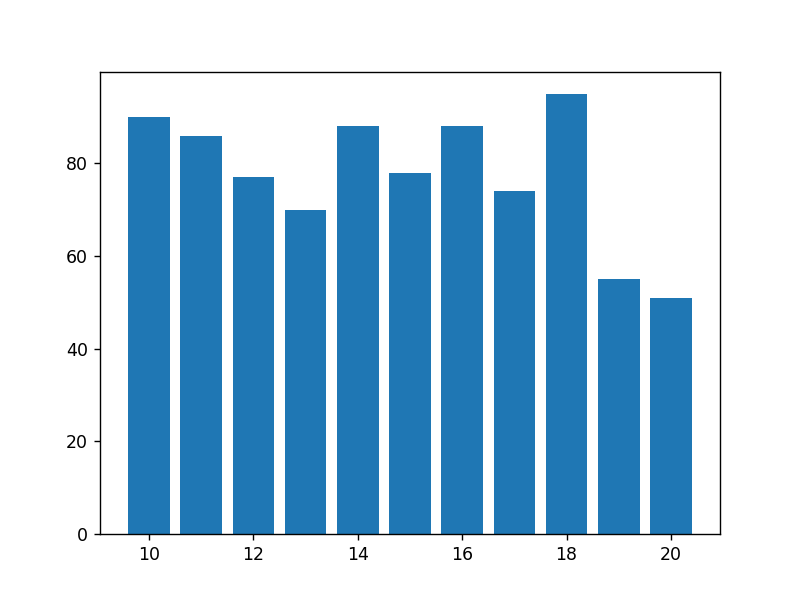

In [36]:
# Gerando gráficos
dados_grafico()

# FIM